# 오디오 파일 다뤄보기
# scipy, simpleaudio
----

## 1. 전처리
* .m4a -> .wav

In [19]:
# 필요없음.
# directory의 .tmp 파일을 .m4a 파일로 이름 변경

import os,sys
file_dir = "C:/Users/user/desktop/sound_data/"

for filename in os.listdir(file_dir):
       infilename = os.path.join(file_dir,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tmp', '.m4a')
       output = os.rename(infilename, newname)

In [25]:
# .m4a -> .wav 

# 사실상 두줄
# audio = AudioSegment.from_file(file,format='m4a')
# audio.export(file,format='wav')

import os
from pydub import AudioSegment

file_dir = "C:/Users/user/desktop/sound_data/"
formats_to_convert = ['.m4a']

for (dirpath, dirnames, filenames) in os.walk(file_dir):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):
            
            filepath = dirpath+'/'+filename
            (path,file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.','')
            try:
                track = AudioSegment.from_file(filepath,file_extension_final)
                wav_filename = filename.replace(file_extension_final,'wav')
                if not os.path.exists(dirpath+'/wav_data'):
                    os.mkdir(file_dir+"wav_data")
                wav_path = dirpath+'/wav_data/'+wav_filename
                file_handle = track.export(wav_path,format='wav')
                # os.remove(filepath)
            except:
                print("Error Converting : ",str(filepath))

## wav 파일 시각화

In [8]:
import numpy as np
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import fftpack

In [5]:
file = "C:/Users/user/desktop/sound_data/wav_data/이봐징징이.wav"
sample_rate, sample_data = wavfile.read(file)

In [16]:
play_time = len(sample_data)/sample_rate
t = np.linspace(0,play_time,len(sample_data))

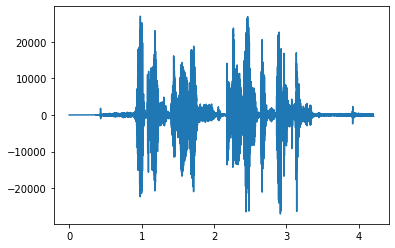

In [17]:
plt.plot(t,sample_data)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


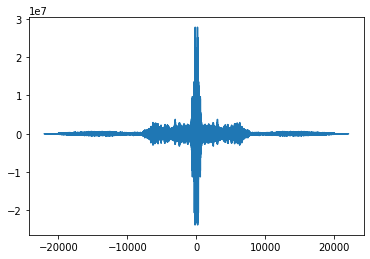

In [19]:
f_dommain = fftpack.fftfreq(len(sample_data))*sample_rate
plt.plot(f_dommain,fftpack.fft(sample_data))

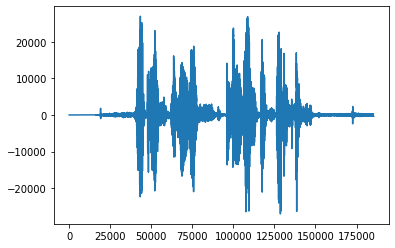

In [100]:
plt.plot(fftpack.ifft(fftpack.fft(sample_data)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


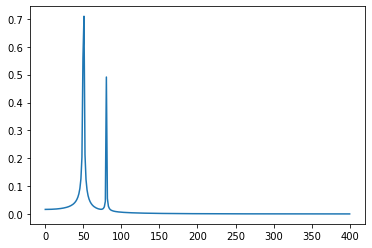

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [17]:
import os
from pydub import AudioSegment

file_dir = "C:/Users/user/desktop/sound_data"
formats_to_convert = ['.m4a']

for (dirpath, dirnames, filenames) in os.walk(file_dir):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):
            
            filepath = dirpath+'/'+filename
            (path,file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.','')
            try:
                track = AudioSegment.from_file(filepath,file_extension_final)
                wav_filename = filename.replace(file_extension_final,'wav')
                wav_path = dirpath+'/'+wav_filename
                file_handle = track.export(wav_path,format='wav')
                os.remove(filepath)
            except:
                print("Error Converting : ",str(filepath))

In [19]:
import os
file_dir = "C:/Users/user/desktop/sound_data"
->
file_list = []
for file in os.listdir(file_dir):
    file_list.append(file)

In [20]:
file_list

['재한이형.wav', '테스트1.wav']

In [23]:
from scipy.io import wavfile

In [37]:
file = file_dir+'/'+file_list[0]
sample_rate, sample_data = wavfile.read(file)

In [26]:
play_time = len(sample_data)/sample_rate
t = np.linspace(0,play_time,len(sample_data))

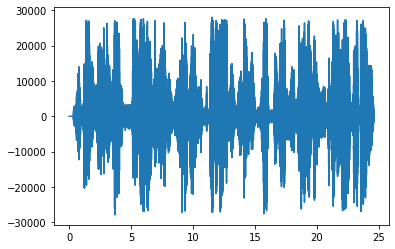

In [28]:
plt.plot(t,sample_data)
plt.show()

In [147]:
import simpleaudio as sa
sa.WaveObject(sample_data,1,2,sample_rate).play()

In [172]:
sa.stop_all()

In [149]:
import scipy.fftpack as fft

fft_sample = scipy.fftpack.fft(sample_data)

In [150]:
file1 = "./m4a_files/이봐징징이.wav"
sample_rate1, sample_data1 = wavfile.read(file1)

In [151]:
fft_sample1 = scipy.fftpack.fft(sample_data1)

In [188]:
play_time = len(sample_data)/sample_rate
play_time1 = len(sample_data1)/sample_rate1
play_time,play_time1

(24.589931972789117, 4.20281179138322)

## inverse fft

In [236]:
ifft_sample1 = np.real(fft.ifft(fft_sample1)).astype(np.int16)

In [207]:
sa.WaveObject(sample_data1,1,2,sample_rate1).play()

In [237]:
sa.WaveObject(ifft_sample1,1,2,sample_rate1).play()

In [214]:
np.bincount(sample_data1==ifft_sample1)

array([111922,  73422], dtype=int64)

In [218]:
sample_data1,ifft_sample1

(array([   0,    0,    0, ..., -311, -309, -317], dtype=int16),
 array([   0,    0,    0, ..., -310, -308, -316], dtype=int16))

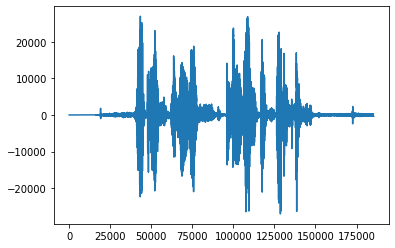

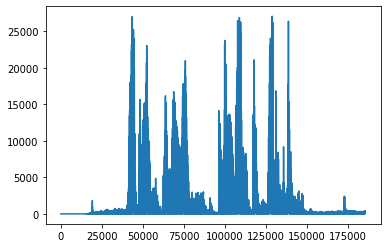

In [199]:
plt.plot(sample_data1)
plt.show()
plt.plot(ifft_sample1)

In [87]:
f = np.linspace(0,sample_rate/2,len(sample_data)/2)
f1 = np.linspace(0,sample_rate1/2,len(sample_data1)/2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [62]:
2*np.pi*sample_rate

277088.47204661975

In [91]:
N = len(sample_data)
N1 = len(sample_data1)

In [90]:
N,N1

(600, 185344)

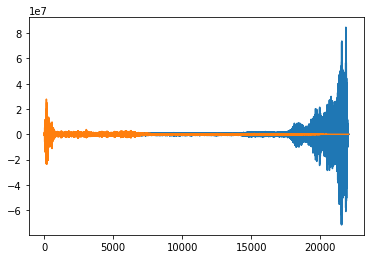

In [241]:
plt.plot(f,fft_sample[N//2:])
plt.plot(f1,fft_sample1[:N1//2])

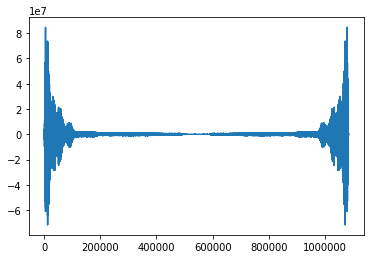

In [242]:
plt.plot(fft_sample)

In [243]:
fft_freq = scipy.fftpack.fftfreq(len(fft_sample))

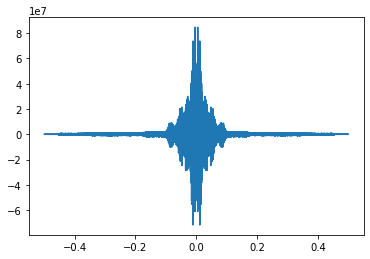

In [244]:
plt.plot(fft_freq,fft_sample)

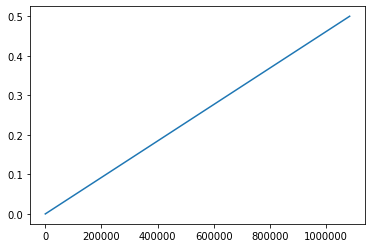

In [245]:
plt.plot(scipy.fftpack.rfftfreq(len(scipy.fftpack.rfft(sample_data))))

In [246]:
fft_sample = scipy.fftpack.rfft(sample_data)

In [247]:
fft_freq = scipy.fftpack.rfftfreq(len(fft_sample))

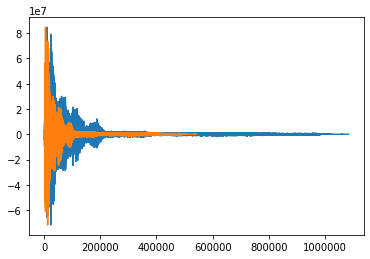

In [260]:
plt.plot(fft_sample)
plt.plot(fft.fft(sample_data)[:N//2])

## 앞쪽 반틈만 rfft->ifft했을시 2배속 재생이됨.. 왜지..?

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


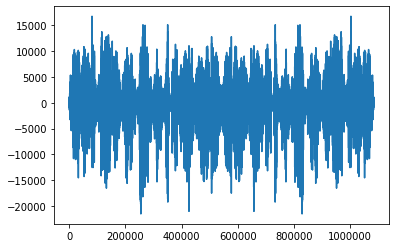

In [257]:
plt.plot(fft.ifft(fft_sample))

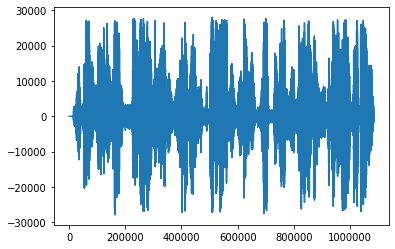

In [255]:
plt.plot(sample_data)

In [262]:
sa.WaveObject(np.real(fft.ifft(fft_sample)).astype(np.int16),1,2,sample_rate).play()

In [135]:
i_fft_sample = scipy.fftpack.irfft(fft_sample)

In [144]:
a = sa.WaveObject(i_fft_sample,1,2,sample_rate).play()

In [145]:
a.stop()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


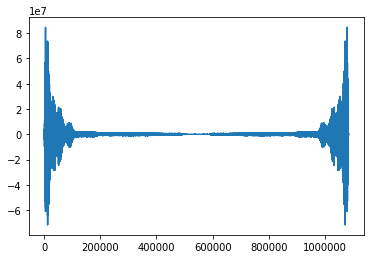

In [129]:
plt.plot(scipy.fftpack.fft(sample_data))

In [114]:
ifft_sample = scipy.fftpack.ifft(fft_sample[0:20000])

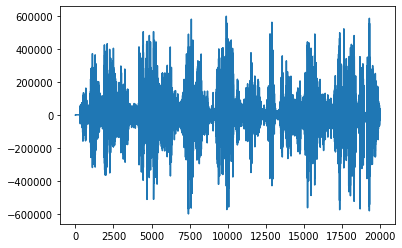

In [115]:
plt.plot(ifft_sample)